In [31]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


aqua=pd.read_csv("water_potability.csv")

In [32]:
aqua.isna().sum()

aqua["ph"].fillna(float(aqua["ph"].mean()),inplace=True)
aqua["Trihalomethanes"].fillna(float(aqua["Trihalomethanes"].mean()),inplace=True)

In [33]:
aqua.isna().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes      0
Turbidity            0
Potability           0
dtype: int64

In [34]:
aqua=aqua.drop(columns=["Sulfate"])

In [35]:
aqua=aqua.apply(lambda x:round(x,2))

In [36]:
aqua.columns=[col.replace(" ","_").lower() for col in aqua.columns]

In [37]:
aqua

,ph,hardness,solids,chloramines,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,7.08,204.89,20791.32,7.30,564.31,10.38,86.99,2.96,0
1,3.72,129.42,18630.06,6.64,592.89,15.18,56.33,4.50,0
2,8.10,224.24,19909.54,9.28,418.61,16.87,66.42,3.06,0
3,8.32,214.37,22018.42,8.06,363.27,18.44,100.34,4.63,0
4,9.09,181.10,17978.99,6.55,398.41,11.56,32.00,4.08,0
...,...,...,...,...,...,...,...,...,...
3271,4.67,193.68,47580.99,7.17,526.42,13.89,66.69,4.44,1
3272,7.81,193.55,17329.80,8.06,392.45,19.90,66.40,2.80,1
3273,9.42,175.76,33155.58,7.35,432.04,11.04,69.85,3.30,1
3274,5.13,230.60,11983.87,6.30,402.88,11.17,77.49,4.71,1


In [38]:
from sklearn.model_selection import train_test_split
features=aqua.drop(columns=["ph"])
target=aqua["ph"]
x_train,x_test,y_train,y_test=train_test_split(features, target, test_size=0.20,random_state=0)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

standardizer=StandardScaler()

standardizer.fit(x_train)

StandardScaler()

In [40]:
x_train_st = standardizer.transform(x_train)
x_test_st= standardizer.transform(x_test)
x_train_st=pd.DataFrame(x_train_st, columns=x_train.columns)
x_test_st=pd.DataFrame(x_test_st, columns=x_train.columns)

In [41]:
knn=KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train_st,y_train)


KNeighborsRegressor(n_neighbors=10)

In [42]:
knn.score(x_test_st,y_test)

-0.016854426023931834

In [43]:
import numpy as np
from sklearn.metrics import mean_squared_error
pred=knn.predict(x_test_st)
np.sqrt(mean_squared_error(y_test,pred))


1.511678932047927

In [44]:
knn.predict(x_test_st)

array([7.42 , 6.778, 6.545, 6.661, 6.889, 6.358, 7.926, 7.109, 7.18 ,
       7.105, 6.666, 6.322, 8.585, 7.109, 7.423, 6.905, 7.25 , 7.982,
       7.498, 7.672, 7.128, 6.926, 7.561, 7.378, 7.725, 7.355, 7.572,
       6.266, 6.905, 6.281, 6.677, 7.186, 6.932, 7.684, 6.607, 6.752,
       7.703, 7.362, 5.905, 7.325, 7.33 , 7.303, 7.419, 6.768, 7.105,
       7.705, 7.386, 7.203, 6.888, 6.796, 6.946, 6.244, 7.315, 7.917,
       6.802, 6.737, 7.245, 6.8  , 6.272, 6.57 , 7.755, 6.976, 7.376,
       6.957, 7.303, 6.152, 7.666, 7.53 , 6.934, 7.369, 7.819, 7.342,
       6.433, 7.116, 7.617, 7.723, 7.812, 7.695, 7.912, 7.04 , 7.285,
       6.585, 7.513, 7.899, 7.176, 7.829, 6.562, 7.837, 6.79 , 6.971,
       8.006, 7.588, 6.636, 6.665, 6.714, 7.268, 8.   , 6.362, 7.626,
       6.546, 7.312, 6.845, 6.79 , 6.848, 7.267, 6.909, 7.164, 6.441,
       7.501, 7.08 , 6.559, 7.028, 7.069, 6.302, 6.842, 7.017, 5.301,
       7.19 , 7.989, 6.807, 7.565, 6.916, 7.437, 6.582, 6.869, 7.829,
       7.329, 7.497,

In [45]:
y_test

2017    8.11
2533    6.77
589     7.08
482     7.71
2620    5.83
        ... 
2802    5.23
1120    7.44
601     7.08
2381    4.95
98      7.21
Name: ph, Length: 656, dtype: float64

In [46]:
corr=np.abs(aqua.corr())
mask=np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)]=True


In [47]:
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

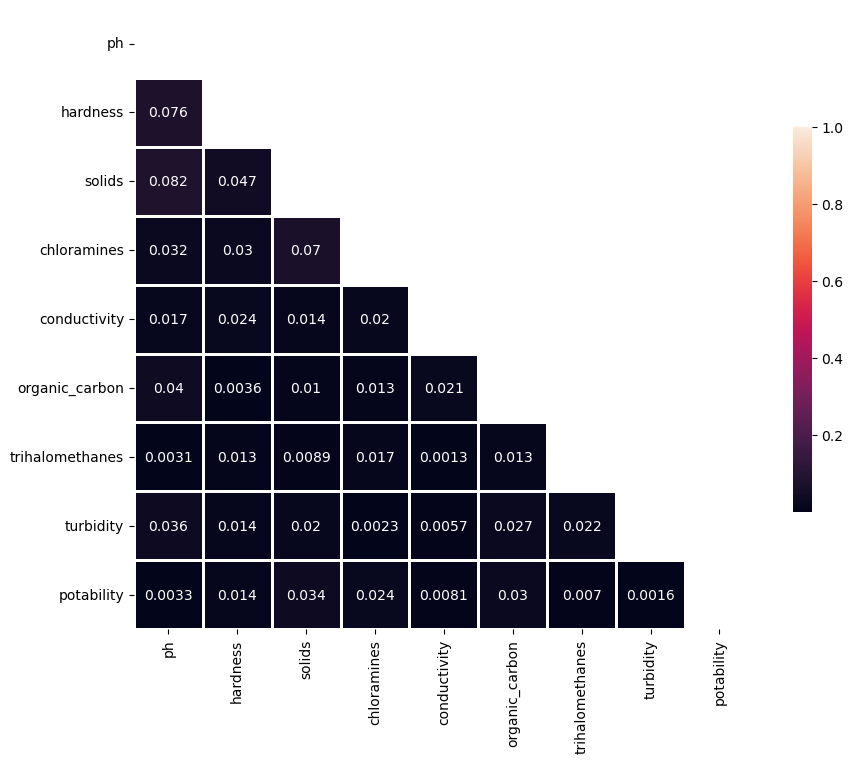

In [48]:
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.8, cbar_kws={"shrink": .5},annot = corr)
plt.show()


In [49]:
# ma che CAZZO.

In [50]:
from sklearn.model_selection import train_test_split
features=aqua.drop(columns=["potability"])
target=aqua["potability"]
x_train,x_test,y_train,y_test=train_test_split(features, target, test_size=0.20,random_state=0)

In [51]:
standardizer=StandardScaler()

standardizer.fit(x_train)

StandardScaler()

In [52]:
x_train_st = standardizer.transform(x_train)
x_test_st= standardizer.transform(x_test)
x_train_st=pd.DataFrame(x_train_st, columns=x_train.columns)
x_test_st=pd.DataFrame(x_test_st, columns=x_train.columns)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_st,y_train)

KNeighborsClassifier(n_neighbors=10)

In [54]:
knn.score(x_test_st,y_test)

0.5975609756097561

In [55]:
knn.predict(x_test_st)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [56]:
y_test

2017    1
2533    0
589     0
482     0
2620    0
       ..
2802    1
1120    1
601     0
2381    1
98      0
Name: potability, Length: 656, dtype: int64

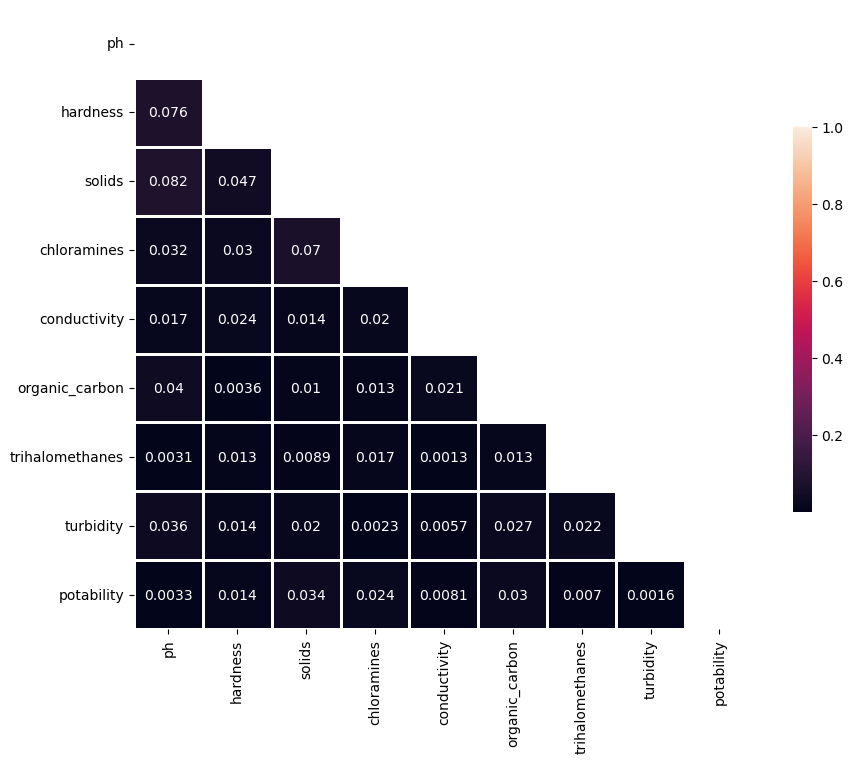

In [57]:
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.8, cbar_kws={"shrink": .5},annot = corr)
plt.show()

In [58]:
features=aqua.drop(columns=["ph"])
target=aqua["ph"]
x_train,x_test,y_train,y_test=train_test_split(features, target, test_size=0.20,random_state=0)

In [60]:
standardizer=StandardScaler()
standardizer.fit(x_train)
x_train_st = standardizer.transform(x_train)
x_test_st= standardizer.transform(x_test)
pd.DataFrame(x_train_st, columns=x_train.columns)


,hardness,solids,chloramines,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,0.972617,1.535807,-1.715440,1.251331,0.187752,-1.251296,-1.512237,-0.807437
1,0.421323,-0.944335,0.890443,-0.898582,-1.188462,-1.345123,-0.790632,1.238487
2,1.129342,-1.169493,-1.560328,-0.933824,1.212399,-1.511224,-0.597345,-0.807437
3,0.919661,-1.670806,0.232768,-0.148598,-0.419225,0.141539,-2.530214,1.238487
4,0.624576,0.372207,1.715639,-0.381692,1.795337,1.224995,-1.744181,1.238487
...,...,...,...,...,...,...,...,...
2615,-0.416484,-0.533679,-1.554124,0.347270,-1.383776,0.888990,-1.898810,-0.807437
2616,1.294945,-0.159828,-0.474543,-0.263352,1.398699,-0.169107,0.536605,1.238487
2617,-0.156908,-0.772119,-0.902653,0.570472,0.340998,-0.633174,-0.185000,-0.807437
2618,1.112200,0.200246,0.803580,-2.378022,1.248457,-0.350423,1.374182,-0.807437


In [62]:
x_train_st=pd.DataFrame(x_train_st, columns=x_train.columns)
x_test_st=pd.DataFrame(x_test_st, columns=x_test.columns)


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error




LR = LinearRegression()
LR.fit(x_train_st,y_train)
pred=LR.predict(x_test_st)
np.sqrt(mean_squared_error(y_test,pred))

1.4943504749789525

In [66]:
LR.score(x_test_st, y_test)

0.006324471849242008

In [67]:
LR.coef_
{feature:coef for feature,coef in zip(features.columns,LR.coef_)}


{'hardness': 0.11333446609758786,
 'solids': -0.1241281287771038,
 'chloramines': -0.04873748683925383,
 'conductivity': 0.03617213118412456,
 'organic_carbon': 0.042249874609416316,
 'trihalomethanes': 0.017006494461023928,
 'turbidity': -0.06224506012946064,
 'potability': 0.013206541209081974}

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [69]:
tree=DecisionTreeRegressor(max_depth=10)

In [70]:
tree.fit(x_train_st,y_train)

DecisionTreeRegressor(max_depth=10)

In [71]:
pred=tree.predict(x_test_st)
np.sqrt(mean_squared_error(y_test,pred))


1.637399183280547

In [72]:
tree.score(x_test_st, y_test)

-0.1930229584313774

In [73]:
features=aqua.drop(columns=["potability"])
target=aqua["potability"]
x_train,x_test,y_train,y_test=train_test_split(features, target, test_size=0.20,random_state=0)

In [76]:
LR = LogisticRegression()
LR.fit(x_train_st,y_train)
pred=LR.predict(x_test_st)

In [79]:
pred

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,

In [80]:
y_test

2017    1
2533    0
589     0
482     0
2620    0
       ..
2802    1
1120    1
601     0
2381    1
98      0
Name: potability, Length: 656, dtype: int64

In [81]:
LR.predict(x_test_st)

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,

In [82]:
new_df=pd.DataFrame(x_test)
new_df["pred"]=pred
new_df["real"]=y_test


In [83]:
new_df

,ph,hardness,solids,chloramines,conductivity,organic_carbon,trihalomethanes,turbidity,pred,real
2017,8.11,217.27,38184.47,7.25,281.07,13.03,78.58,4.43,1,1
2533,6.77,179.81,23793.03,5.33,461.53,13.56,60.57,4.15,0,0
589,7.08,180.89,17705.61,6.22,447.94,10.46,32.07,4.00,0,0
482,7.71,178.92,18476.62,8.23,518.04,10.64,63.16,3.86,0,0
2620,5.83,165.47,30021.26,8.43,494.15,16.67,69.58,5.19,0,0
...,...,...,...,...,...,...,...,...,...,...
2802,5.23,152.09,24790.72,6.31,307.92,12.59,51.63,3.70,1,1
1120,7.44,203.07,25489.08,8.18,405.42,13.28,74.41,2.57,1,1
601,7.08,220.55,28135.08,7.98,421.46,17.53,86.85,3.57,0,0
2381,4.95,170.44,23000.72,4.43,346.64,13.28,84.55,3.78,1,1


In [84]:
from sklearn.tree import DecisionTreeClassifier


In [85]:
tree=DecisionTreeClassifier(max_depth=10)

In [87]:
tree.fit(x_train_st,y_train)

DecisionTreeClassifier(max_depth=10)

In [90]:
pred=tree.predict(x_test_st)
tree.score(x_test_st, y_test)


1.0

In [92]:
y_test

2017    1
2533    0
589     0
482     0
2620    0
       ..
2802    1
1120    1
601     0
2381    1
98      0
Name: potability, Length: 656, dtype: int64